# Perceptron

üë®‚Äçüíª **Arjun Adhikari**, Oct 22, 2019


## an Artificial Neuron

- A Perceptron is a single layer neural network
- It acts a Linear Classifier, Binary classification
- Loss Function : Binary Cross Entropy
  (-ve of Log Likelihood)
- Optimisation : Gradient Descent/ Stochastic Gradient Descent

## Learning Goals

- How to implement Perceptron?
- Understanding Vectorization,
    writing efficient Code
    without using for loop!
- What is the meaning of "Linear Classifier"?



In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [30]:
X, Y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=10)
print(X.shape, Y.shape)

(500, 2) (500,)


In [31]:
plt.style.use('seaborn')

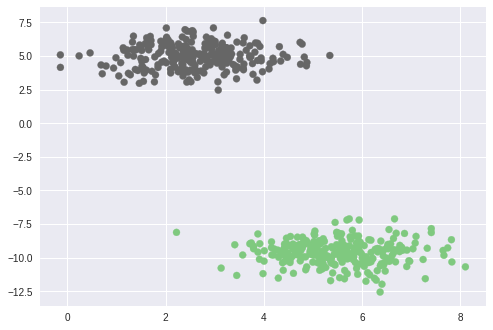

In [32]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.Accent)
plt.show()

Here X is a matrix with two features and Y is with a label.  
The goal of the perceptron is to figure out out boundary that separates into two classes.

## Model and Helper functions

In [33]:
def sigmoid(z):
    
    return (1.0) / (1+np.exp(-z))

In [34]:
sigmoid(5)

0.9933071490757153

In [35]:
z = np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

The sigmoid function is broadcasting from Numpy Array.  
i.e. the sigmoid function is executed on every elements on the list.  
This is not possible on Python Lists;  
but possible due to Numpy Array which takes sigmoid of every elements.

### Implement Perceptron Learning Algorithms

We need methods for:
- Learn the weights
- Reduce the Loss
- Make the predictions

Here the W wil be the row vector.
But the X will be the matrix of $m*n$ order, where m is the no. of input and n is the no. of features.

#### Prediction Function

In [36]:
def predict(X, weights):
    
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

#### Loss Function

In [37]:
def loss(X, Y, weights):
    
    """ Binary Cross Entropy """
    Y_ = predict(X, weights)
    cost = np.mean(-Y * np.log(Y_) - (1-Y) * np.log(1 - Y_)) # Taking the mean of the values returned by Loss Function
    return cost

#### Update Function
(Learn the weights)

In [38]:
 def update(X, Y, weights, learning_rate):
        
    """Perform weight updates for 1 epoch."""
    Y_ = predict(X, weights)
    dw = np.dot(X.T, Y_ - Y) # Multiplication of n*m(after transpose) matrix and m*1 matrix to get n*1 matrix.

    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    
    return weights # This was missed earlier.
        

In [39]:
 def train(X, Y, learning_rate=0.5, maxEpochs=100):
        
    # Modify the input to handle the bias term.
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))

    # Initialiaze weights
    weights = np.zeros(X.shape[1]) # n+1 entries

   # Iterate over all epochs and make updates.
    for epoch in range(maxEpochs):

        weights = update(X, Y, weights, learning_rate)

        if epoch % 20 == 0:
            loss_ = loss(X, Y, weights)
            print("Epoch %d Loss %.4f" % (epoch, loss_))

    return weights

In [40]:
train(X, Y)

Epoch 0 Loss 0.0006
Epoch 20 Loss 0.0005
Epoch 40 Loss 0.0005
Epoch 60 Loss 0.0004
Epoch 80 Loss 0.0004


array([ 0.02204952, -0.30768518,  1.90003958])